Marital Success Prediction Data Story

1.	The questions asked
2.	The trends investigated
3.	The resulting visualizations and conclusions.

Questions and Trends:
1. Given the dataset from the NSFG, is it possible to predict the success or failure of a first marriage given the answers to over 3000 questions asked of 7643 women between the ages of 16 and 44.
2. Given that there were over 3000 questions asked of each respondent, which of these are redundant and/or least relevant and can be eliminated from the training set data?
3. What are some correlations that can be investigated visually with histograms and heat maps?

See below for the resulting visualizations and conclusions:

I. Load libraries

In [1]:
#Capstone Proj 1 EDA
from __future__ import print_function, division

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [4]:
import numpy as np
import pandas as pd
import random
import thinkstats2
import thinkplot
import nsfg
import survival
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from collections import Counter

II. 
Import dataset from NSFG Cycle 6 (2002 survey cycle, female respondents, convert fixed width data to Pandas dataframe)
Link to online codebook:
http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=femaleResp

In [5]:
resp6=nsfg.ReadFemResp()

III. Preliminary data exploration

In [6]:
#find out the shape of the dataset
print(resp6.shape)

(7643, 3087)


The dataframe has 7643 rows and 3087 columns: 7643 respondents and 3087 variables (7643 instances with 3087 attributes)

In [7]:
resp6.head(20)

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth
0,2298,1,5,5,1,5.0,27,27,902,27,...,0,3247.916977,5123.759559,5556.717241,2,18,1234,1222,18:26:36,110.492667
1,5012,1,5,1,5,5.0,42,42,718,42,...,0,2335.279149,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000
2,11586,1,5,1,5,5.0,43,43,708,43,...,0,2335.279149,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167
3,6794,5,5,4,1,5.0,15,15,1042,15,...,0,3783.152221,5071.464231,5923.977368,2,18,1234,1222,15:54:43,28.642833
4,616,1,5,4,1,5.0,20,20,991,20,...,0,5341.329968,6437.335772,7229.128072,2,18,1233,1221,14:19:44,69.502667
5,845,1,5,4,1,5.0,42,42,727,42,...,0,2335.279149,3725.796795,4705.681352,2,18,1234,1222,17:10:13,95.488000
6,10333,5,5,3,1,5.0,17,17,1029,17,...,0,2335.279149,2687.399758,3139.151658,2,18,1236,1224,14:14:38,61.204333
7,855,5,5,4,5,5.0,22,22,965,22,...,0,4670.558298,7122.614751,10019.382170,2,18,1235,1223,14:42:52,59.756333
8,8656,5,5,4,1,5.0,38,38,780,38,...,0,5198.652195,6027.568848,6520.021223,2,18,1237,1225,15:32:34,56.978833
9,3566,5,5,4,5,5.0,21,21,974,21,...,0,2764.142038,3240.986558,4559.095792,2,18,1231,1219,16:22:25,104.744667


In [8]:
#Describe the dataframe with some basic statistics.
print(resp6.describe())

             caseid      rscrinf     rdormres     rostscrn  rscreenhisp  \
count   7643.000000  7643.000000  7643.000000  7643.000000  7643.000000   
mean    6272.107811     2.589952     4.901086     3.210258     4.207641   
std     3638.824134     1.957642     0.621227     1.453237     1.594345   
min        1.000000     1.000000     1.000000     1.000000     1.000000   
25%     3105.500000     1.000000     5.000000     2.000000     5.000000   
50%     6275.000000     1.000000     5.000000     3.000000     5.000000   
75%     9442.000000     5.000000     5.000000     4.000000     5.000000   
max    12571.000000     5.000000     5.000000     8.000000     5.000000   

       rscreenrace        age_a        age_r      cmbirth      agescrn  \
count  7636.000000  7643.000000  7643.000000  7643.000000  7643.000000   
mean      4.543740    29.501374    29.503729   872.764098    29.503729   
std       0.915728     8.431868     8.433187   101.161818     8.433187   
min       1.000000    15.000

In [9]:
resp6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7643 entries, 0 to 7642
Columns: 3087 entries, caseid to intvlngth
dtypes: float64(2491), int64(595), object(1)
memory usage: 180.0+ MB


In [10]:
# evermarried distribution
print(resp6.groupby('evrmarry').size())

evrmarry
0    3517
1    4126
dtype: int64


From Cycle 6 Codebook:
cmmarrhx (340 - 343)
Century Month for Date of 1st Marriage (Computed)
NSFG Cycle 6 Female Respondent File Section C
1 of 237
Value Label Total
. inapplicable 3525
301-1164 BEFORE 1997 2928
1165-1239 JANUARY 1997 OR LATER 1161
9997 Not ascertained 1
9998 Refused 9
9999 Don't know 19
Total 7643
Universe:
Applicable if R has ever been married (fmarit = 1, 2, 3, or 4)
Compute Age at First Marriage (***First examine cmarrhx to find maximum values)
https://healthyalgorithms.com/2014/07/03/tabular-data-in-python-getting-just-the-columns-i-want-from-pandas-dataframe-describe/

IV. Data Cleaning
Search for outliers so computed ages aren't skewed, 9997-9999 are codes, not century months.

In [11]:
#resp6['cmmarrhx'].max()
resp6['cmmarrhx'].nlargest(50)

71      9999.0
174     9999.0
682     9999.0
787     9999.0
816     9999.0
966     9999.0
1157    9999.0
1234    9999.0
1305    9999.0
2013    9999.0
2107    9999.0
2556    9999.0
3547    9999.0
3998    9999.0
5224    9999.0
5326    9999.0
5786    9999.0
6692    9999.0
7527    9999.0
446     9998.0
2039    9998.0
2599    9998.0
2751    9998.0
2765    9998.0
2789    9998.0
3220    9998.0
3868    9998.0
4149    9998.0
213     9997.0
3056    1236.0
1015    1235.0
2244    1235.0
3304    1235.0
4368    1235.0
2339    1234.0
2489    1234.0
4633    1234.0
5808    1234.0
324     1233.0
2562    1233.0
2569    1233.0
3663    1233.0
3872    1233.0
3873    1233.0
3966    1233.0
6024    1233.0
6059    1233.0
6097    1233.0
6174    1233.0
6285    1233.0
Name: cmmarrhx, dtype: float64

Replace invalid entries with np.nan
Convert century months to ages

In [12]:
resp6.cmmarrhx.replace([9997, 9998, 9999], np.nan, inplace=True)
resp6['agemarry'] = (resp6.cmmarrhx - resp6.cmbirth) / 12.0
resp6['age'] = (resp6.cmintvw - resp6.cmbirth) / 12.0

Compute age at first marriage if ever married, age at interview if never married.

In [13]:
complete = resp6[resp6.evrmarry==1].agemarry.dropna()
ongoing = resp6[resp6.evrmarry==0].age

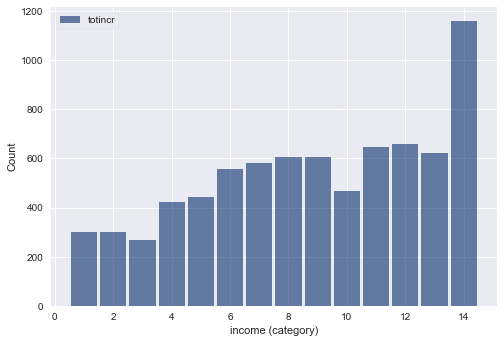

In [14]:
hist = thinkstats2.Hist(resp6.totincr)
thinkplot.Hist(hist, label='totincr')
thinkplot.Config(xlabel='income (category)', ylabel='Count')

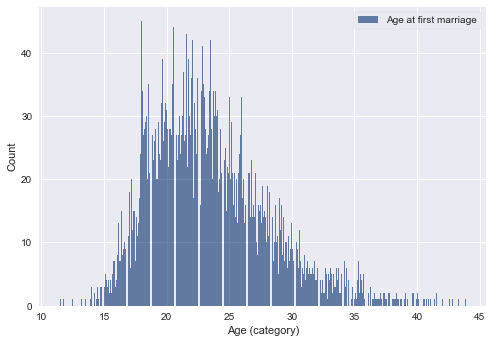

In [15]:
#Plot histogram of age at first marriage
#complete = resp6[resp6.evrmarry==1].agemarry.dropna()
hist = thinkstats2.Hist(resp6[resp6.evrmarry==1].agemarry.dropna())
thinkplot.Hist(hist, label='Age at first marriage')
thinkplot.Config(xlabel='Age (category)', ylabel='Count')

redo histogram with bins, then compare age at first marriage for those who divorced vs those who didn't
matplotlib.pyplot.hist(x, bins=None, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, hold=None, data=None, **kwargs)

#import seaborn as sns

In [16]:
#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})

#import matplotlib.pyplot as plt

Use bins to simplify histogram 

(array([   3.,    6.,   34.,  111.,  206.,  435.,  433.,  487.,  467.,
         446.,  321.,  316.,  219.,  184.,  124.,   90.,   56.,   49.,
          38.,   19.,   16.,   12.,    8.,    4.,    5.]),
 array([ 11.5       ,  12.79333333,  14.08666667,  15.38      ,
         16.67333333,  17.96666667,  19.26      ,  20.55333333,
         21.84666667,  23.14      ,  24.43333333,  25.72666667,
         27.02      ,  28.31333333,  29.60666667,  30.9       ,
         32.19333333,  33.48666667,  34.78      ,  36.07333333,
         37.36666667,  38.66      ,  39.95333333,  41.24666667,
         42.54      ,  43.83333333]),
 <a list of 25 Patch objects>)

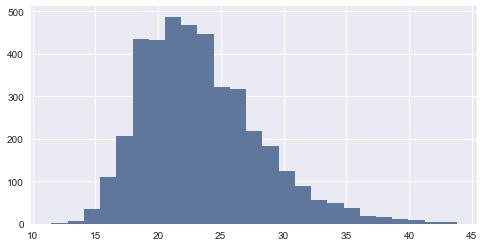

In [17]:
#hist = thinkstats2.Hist(resp6[resp6.evrmarry==1].agemarry.dropna())
#thinkplot.Hist(hist, bins=20, label='Age at first marriage')
#thinkplot.Config(xlabel='Age (category)', ylabel='Count')
plt.hist(resp6[resp6.evrmarry==1].agemarry.dropna(),bins=25)

Histogram with age of first marriage of those who divorced (marendhx==2) Need to add labels

(array([   1.,    3.,   10.,   21.,   55.,  102.,  107.,  103.,  115.,
         102.,   69.,   82.,   52.,   31.,   30.,   34.,   11.,    9.,
          11.,    8.,    3.,    3.,    4.,    1.,    3.]),
 array([ 12.5       ,  13.43333333,  14.36666667,  15.3       ,
         16.23333333,  17.16666667,  18.1       ,  19.03333333,
         19.96666667,  20.9       ,  21.83333333,  22.76666667,
         23.7       ,  24.63333333,  25.56666667,  26.5       ,
         27.43333333,  28.36666667,  29.3       ,  30.23333333,
         31.16666667,  32.1       ,  33.03333333,  33.96666667,
         34.9       ,  35.83333333]),
 <a list of 25 Patch objects>)

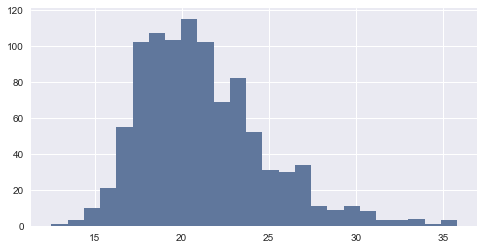

In [18]:
plt.hist(resp6[resp6.marendhx==2].agemarry.dropna(),bins=25)

In [19]:
ndv=resp6[(resp6.marendhx!=2) & (resp6.evrmarry==1)].agemarry.dropna()

In [20]:
dv=resp6[(resp6.marendhx==2) & (resp6.evrmarry==1)].agemarry.dropna()

Plot the age at first marriage for divorced vs non-divorced on the same histogram:
Example:
x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = numpy.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

#from matplotlib import pyplot

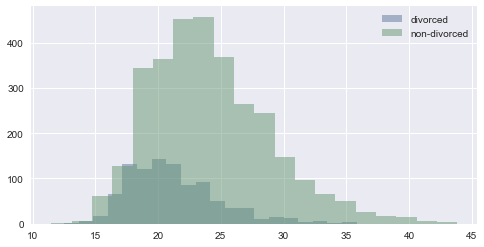

In [21]:
pyplot.hist(dv, bins=20, alpha=0.5, label='divorced')
pyplot.hist(ndv, bins=20, alpha=0.5, label='non-divorced')
pyplot.legend(loc='upper right')
pyplot.show()

Redo with weights to normalize scale (example from stackoverflow)
x = np.random.normal(5, 2, 10000)
y = np.random.normal(2, 1, 3000000)

xweights = 100 * np.ones_like(x) / x.size
yweights = 100 * np.ones_like(y) / y.size

fig, ax = plt.subplots()
ax.hist(x, weights=xweights, color='lightblue', alpha=0.5)
ax.hist(y, weights=yweights, color='salmon', alpha=0.5)

ax.set(title='Histogram Comparison', ylabel='% of Dataset in Bin')
ax.margins(0.05)
ax.set_ylim(bottom=0)
plt.show()

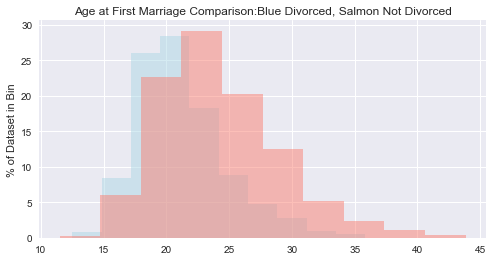

In [23]:
dvweights = 100 * np.ones_like(dv) / dv.size
ndvweights = 100 * np.ones_like(ndv) / ndv.size

fig, ax = plt.subplots()
ax.hist(dv, weights=dvweights, color='lightblue', alpha=0.5, label='divorced')
ax.hist(ndv, weights=ndvweights, color='salmon', alpha=0.5, label='not divorced')

ax.set(title='Age at First Marriage Comparison:Blue Divorced, Salmon Not Divorced', ylabel='% of Dataset in Bin')
ax.margins(0.05)
ax.set_ylim(bottom=0)
plt.show()

Violin Plot
sns.violinplot(titanic.Age.dropna(), titanic.Sex)
plt.hist(resp6[resp6.evrmarry==1].agemarry.dropna(),bins=25)
plt.hist(resp6[resp6.marendhx==2].agemarry.dropna(),bins=25)
sns.violinplot(resp6[resp6.evrmarry==1].agemarry.dropna(),resp6.marendhx)


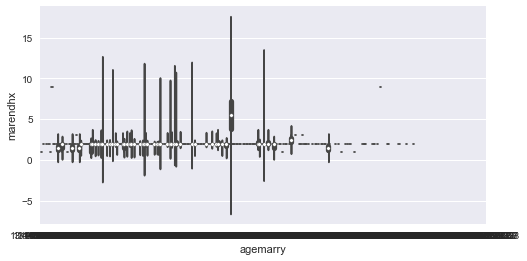

In [24]:
sns.violinplot(resp6[resp6.evrmarry==1].agemarry.dropna(),resp6.marendhx)

Create a new dataframe with only those respondents who have ever been married (evrmarry==1) 4126 rows.

#making a copy doesn't seem to work so I will just downsize the original resp6 dataframe to include only evermarrieds
resp6mar=resp6.copy

In [25]:
print(resp6.shape)

(7643, 3089)


In [26]:
resp6=resp6[resp6.evrmarry==1]

In [27]:
print(resp6.shape)

(4126, 3089)


In [28]:
resp6[resp6.evrmarry==1].count()

caseid             4126
rscrinf            4126
rdormres           4126
rostscrn           4126
rscreenhisp        4126
rscreenrace        4122
age_a              4126
age_r              4126
cmbirth            4126
agescrn            4126
marstat            4126
fmarstat            161
fmarit             4126
evrmarry           4126
hisp               4126
hispgrp             891
numrace            4126
roscnt             4126
hplocale           3241
manrel             3171
fl_rage            4126
fl_rrace           4126
fl_rhisp           4126
goschol            4126
vaca                456
higrade            4126
compgrd            4116
havedip            4086
dipged             3553
cmhsgrad           3194
                   ... 
invitro_i          4126
endomet_i          4126
fibroids_i         4126
pidtreat_i         4126
evhivtst_i         4126
insuranc           4126
metro              4126
religion           4126
laborfor           4126
insuranc_i         4126
metro_i         

#resp6.replace([9998,9998,9999], np.nan, inplace=True)
#resp6['agemarry']= (resp6.cmmarrhx-resp6.cmbirth)/12.0
#resp6['age']=(resp6.cmintvw - resp6.cmbirth)/12.0

In [29]:
complete=resp6[resp6.evrmarry==1].agemarry.dropna()

In [30]:
ongoing=resp6[resp6.evrmarry==0].age

In [31]:
#from collections import Counter
#The following code is from Think Stats 2 by Downey

In [32]:
def EstimateHazardFunction(complete, ongoing,label='',verbose=False):
    if np.sum(np.isnan(complete)):
        raise ValueError("complete contains NaNs")
    if np.sum(np.isnan(ongoing)):
        raise ValueError("ongoing contains NaNs")
    
    hist_complete = Counter(complete)
    hist_ongoing = Counter(ongoing)
    
    ts=list(hist_complete | hist_ongoing)
    ts.sort()
    
    at_risk = len(complete) + len(ongoing)
    
    lams=pd.Series(index=ts)
    for t in ts:
        ended = hist_complete[t]
        censored = hist_ongoing[t]
        
        lams[t]=ended/at_risk
        if verbose:
            print(t, at_risk, ended, censored, lams[t])
        at_risk -= ended+censored
        
    return survival.HazardFunction(lams, label=label)

        

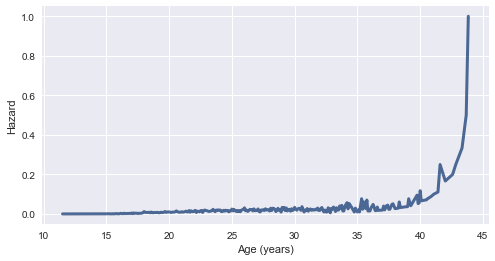

In [33]:
hf = EstimateHazardFunction(complete,ongoing)
thinkplot.Plot(hf)
thinkplot.Config(xlabel='Age (years)',ylabel='Hazard')

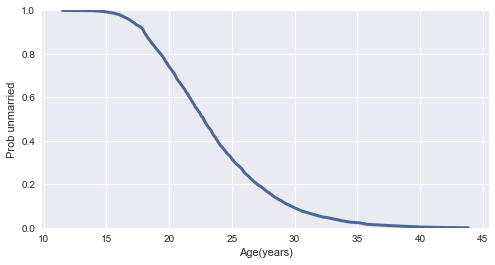

In [34]:
sf=hf.MakeSurvival()
thinkplot.Plot(sf)
thinkplot.Config(xlabel='Age(years)',
                 ylabel='Prob unmarried',
                 ylim=[0,1])

In [35]:
resp6[resp6.evrmarry==1].count()

caseid             4126
rscrinf            4126
rdormres           4126
rostscrn           4126
rscreenhisp        4126
rscreenrace        4122
age_a              4126
age_r              4126
cmbirth            4126
agescrn            4126
marstat            4126
fmarstat            161
fmarit             4126
evrmarry           4126
hisp               4126
hispgrp             891
numrace            4126
roscnt             4126
hplocale           3241
manrel             3171
fl_rage            4126
fl_rrace           4126
fl_rhisp           4126
goschol            4126
vaca                456
higrade            4126
compgrd            4116
havedip            4086
dipged             3553
cmhsgrad           3194
                   ... 
invitro_i          4126
endomet_i          4126
fibroids_i         4126
pidtreat_i         4126
evhivtst_i         4126
insuranc           4126
metro              4126
religion           4126
laborfor           4126
insuranc_i         4126
metro_i         

In [36]:
resp6.count()

caseid             4126
rscrinf            4126
rdormres           4126
rostscrn           4126
rscreenhisp        4126
rscreenrace        4122
age_a              4126
age_r              4126
cmbirth            4126
agescrn            4126
marstat            4126
fmarstat            161
fmarit             4126
evrmarry           4126
hisp               4126
hispgrp             891
numrace            4126
roscnt             4126
hplocale           3241
manrel             3171
fl_rage            4126
fl_rrace           4126
fl_rhisp           4126
goschol            4126
vaca                456
higrade            4126
compgrd            4116
havedip            4086
dipged             3553
cmhsgrad           3194
                   ... 
invitro_i          4126
endomet_i          4126
fibroids_i         4126
pidtreat_i         4126
evhivtst_i         4126
insuranc           4126
metro              4126
religion           4126
laborfor           4126
insuranc_i         4126
metro_i         

In [37]:
resp6.head(5)

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,screentime,intvlngth,agemarry,age
1,5012,1,5,1,5,5.0,42,42,718,42,...,2846.799490,4744.191350,2,18,1233,1221,16:30:59,64.294000,21.333333,42.916667
2,11586,1,5,1,5,5.0,43,43,708,43,...,2846.799490,4744.191350,2,18,1234,1222,18:19:09,75.149167,16.833333,43.833333
5,845,1,5,4,1,5.0,42,42,727,42,...,3725.796795,4705.681352,2,18,1234,1222,17:10:13,95.488000,17.500000,42.250000
8,8656,5,5,4,1,5.0,38,38,780,38,...,6027.568848,6520.021223,2,18,1237,1225,15:32:34,56.978833,18.583333,38.083333
10,5917,1,5,3,1,5.0,44,43,714,43,...,2762.143030,3488.586646,2,18,1233,1221,15:38:06,96.850167,19.916667,43.250000


#create a new column 'everdivorced' where if marend ==2 everdivorced=1 else everdivorced = 0
#This worked but it's not what I need
#resp6['evrdivorced'] = resp6.marendhx
Try:
resp6['evrdivorced'] = np.where((resp6.marendhx==2), 1),
          np.where((resp6.marendhx!=2), 0,20))  

In [38]:
resp6['evrdivorced'] = np.where((resp6.marendhx==2), 1, np.where((resp6.marendhx!=2), 0,20))

Check to see if column was added:

In [39]:
resp6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4126 entries, 1 to 7638
Columns: 3090 entries, caseid to evrdivorced
dtypes: float64(2493), int32(1), int64(595), object(1)
memory usage: 97.3+ MB


In [40]:
#resp6['evrdivorced'].info()

In [41]:
resp6.evrdivorced.unique()

array([1, 0], dtype=int64)

In [42]:
resp6.marendhx.unique()

array([  2.,  nan,   1.,   3.,   9.,   8.])

In [43]:
#DataFrame.corr(method='pearson', min_periods=1)[source]¶
#resp6.corr(method='pearson')

In [44]:
#sns.heatmap(corrmat)

In [45]:
#corrmat.to_csv('corrmat.csv', sep=',', encoding='utf-8')

In [46]:
#resp6.to_csv('resp6.csv', sep=',', encoding='utf-8')

#****** This is where I eliminate a large number of variables

In [47]:
#this is first purge with about 200 variables remaining
#resp6 = resp6[['caseid', 'rostscrn', 'rscreenrace', 'age_r', 'roscnt', 'goschol', 'higrade', 'compgrd', 'havedip', 'dipged', 'havedeg', 'degrees', 'onown', 'intact', 'parmarr', 'lvsit14f', 'lvsit14m', 'momdegre', 'momworkd', 'momchild', 'momfstch', 'manrasdu', 'daddegre', 'intact18', 'onown18', 'numbabes', 'totplacd', 'ndied', 'hasbabes', 'menarche', 'numpregs', 'everpreg', 'agemarhx', 'hxagemar', 'lvtoghx', 'engaghx', 'racehx1', 'chedmarn', 'marbefhx', 'kidshx', 'numkdshx', 'kidlivhx', 'agefstsx', 'c_sex18', 'c_sex15', 'c_sex20', 'grfstsx', 'talkpar1', 'pledge', 'fpage', 'fprelage', 'fprelyrs', 'knowfp', 'agesxafm', 'afmen18', 'afmen15', 'afmen20', 'lifeprt', 'ptsb4mar', 'lifeprts', 'evertubs', 'everhyst', 'everovrs', 'everothr', 'anyfster', 'rsurgstr', 'posiblpg', 'reasimpr', 'canhaver', 'pregnono', 'rstrstat', 'pill', 'condom', 'vasectmy', 'widrawal', 'depoprov', 'norplant', 'rhythm', 'tempsafe', 'mornpill', 'ectimesx', 'nometh', 'nometh2', 'mthfrsts01', 'mthfstsx01', 'pap12', 'pelvic12', 'rwant', 'typallpg', 'hlpmc', 'infrtprb', 'diabetes', 'ovacyst', 'uf', 'endo', 'ovuprob', 'limited', 'equipmnt', 'cover12', 'brnout', 'paydu', 'relraisd', 'attnd14', 'relcurr', 'fundam', 'reldlife', 'attndnow', 'evwrk6mo', 'cmbfstwk', 'evrntwrk', 'wrk12mos', 'fpt12mos', 'dolastwk1', 'rwrkst', 'everwork', 'rpayjob', 'rnumjob', 'rftptx', 'rearnty', 'better', 'staytog', 'samesex', 'anyact', 'sxok18', 'sxok16', 'chreward', 'chsuppor', 'gayadopt', 'okcohab', 'warm', 'achieve', 'family', 'chbother', 'lessplsr', 'wage', 'selfinc', 'socsec', 'disabil', 'retire', 'ssi', 'unemp', 'interest', 'dividend', 'toincwmy', 'totinc', 'pubasst', 'pubastyp1', 'foodstmp', 'wic', 'hlptrans', 'hlpchldc', 'hlpjob', 'ager', 'educat', 'hieduc', 'hispanic', 'race', 'hisprace', 'numkdhh', 'numfmhh', 'intctfam', 'parage14', 'educmom', 'agemomb1', 'compreg', 'lossnum', 'abortion', 'lbpregs', 'parity', 'births5', 'outcom01', 'ageprg01', 'agecon01', 'cebow', 'cebowc', 'agebaby1', 'liv1chld', 'fmar1age', 'b1premar', 'cohever', 'vry1stag', 'sex1age', 'fsexpage', 'fecund', 'infert', 'condomr', 'sex1mthd1', 'oldwp01', 'wantrp01', 'wantp01', 'fptit12', 'fptitmed', 'anyprghp', 'anymschp', 'infever', 'evhivtst', 'insuranc', 'metro', 'religion', 'laborfor', 'poverty', 'totincr', 'pubassis', 'agemarry', 'evrdivorced']].copy()

In [48]:
#this is second purge with about 100 variables remaining
#resp6 = resp6[['caseid', 'rscreenrace', 'age_r', 'roscnt', 'goschol', 'higrade', 'havedip', 'dipged', 'havedeg', 'degrees', 'parmarr', 'lvsit14f', 'lvsit14m','momdegre', 'momworkd', 'momchild', 'momfstch', 'manrasdu', 'daddegre', 'intact18', 'onown18', 'numbabes', 'totplacd', 'ndied', 'hasbabes', 'menarche', 'numpregs', 'everpreg', 'hxagemar', 'lvtoghx', 'marbefhx', 'kidshx', 'agefstsx', 'knowfp', 'lifeprt', 'ptsb4mar', 'lifeprts', 'evertubs', 'anyfster', 'rsurgstr', 'rstrstat', 'pill', 'condom', 'rhythm', 'tempsafe', 'mornpill', 'rwant', 'diabetes', 'ovacyst', 'uf', 'endo', 'ovuprob', 'limited', 'equipmnt', 'cover12', 'brnout', 'paydu', 'relraisd', 'relcurr', 'attndnow', 'evwrk6mo', 'wrk12mos', 'everwork', 'rearnty', 'better', 'staytog', 'samesex', 'sxok18', 'sxok16', 'chreward', 'chsuppor', 'gayadopt', 'okcohab', 'warm', 'achieve', 'family', 'chbother', 'totinc', 'ager', 'educat', 'hispanic', 'race', 'numkdhh', 'numfmhh', 'intctfam', 'educmom', 'parity', 'fmar1age', 'cohever', 'vry1stag', 'fecund', 'insuranc', 'metro', 'religion', 'laborfor', 'poverty', 'totincr', 'pubassis', 'agemarry', 'evrdivorced']].copy() 

In [49]:
#this is third purge to get rid of variables with nulls, 79 remaining variables
#resp6 = resp6[['caseid', 'roscnt', 'parmarr',  'intact18', 'onown18', 'numbabes', 'totplacd', 'ndied', 'hasbabes', 'menarche', 'numpregs', 'everpreg','knowfp', 'lifeprt', 'ptsb4mar', 'lifeprts', 'evertubs', 'anyfster', 'rsurgstr', 'rstrstat', 'pill', 'condom', 'rhythm', 'tempsafe', 'mornpill', 'rwant', 'diabetes', 'ovacyst', 'uf', 'endo', 'ovuprob', 'limited', 'equipmnt', 'cover12', 'brnout', 'paydu', 'relraisd', 'relcurr', 'attndnow', 'evwrk6mo', 'wrk12mos', 'everwork', 'rearnty', 'better', 'staytog', 'samesex', 'sxok18', 'sxok16', 'chreward', 'chsuppor', 'gayadopt', 'okcohab', 'warm', 'achieve', 'family', 'chbother', 'totinc', 'ager', 'educat', 'hispanic', 'race', 'numkdhh', 'numfmhh', 'intctfam', 'educmom', 'parity', 'fmar1age', 'cohever', 'fecund', 'insuranc', 'metro', 'religion', 'laborfor', 'totincr', 'pubassis']].copy()

In [50]:
#fourth time to add back in higrade since it's needed for a visualization (removed lvisit14f variable because of null values, then removed rsscreenrace because of 7 null values)
resp6 = resp6[['caseid', 'roscnt','higrade', 'parmarr',  'intact18', 'onown18', 'numbabes', 'ndied', 'hasbabes', 'menarche', 'numpregs', 'everpreg', 'knowfp', 'lifeprt', 'ptsb4mar', 'lifeprts', 'evertubs', 'anyfster', 'rsurgstr', 'rstrstat', 'pill', 'condom', 'rhythm', 'tempsafe', 'mornpill', 'rwant', 'diabetes', 'ovacyst', 'uf', 'endo', 'ovuprob', 'limited', 'equipmnt', 'cover12', 'brnout', 'paydu', 'relraisd', 'relcurr', 'attndnow', 'evwrk6mo', 'wrk12mos', 'everwork', 'rearnty', 'better', 'staytog', 'samesex', 'sxok18', 'sxok16', 'chreward', 'chsuppor', 'gayadopt', 'okcohab', 'warm', 'achieve', 'family', 'totinc', 'ager', 'educat', 'hispanic', 'race', 'numkdhh', 'numfmhh', 'intctfam', 'educmom', 'parity', 'fmar1age', 'cohever', 'vry1stag', 'fecund', 'insuranc', 'metro', 'religion', 'laborfor', 'poverty', 'totincr', 'pubassis', 'agemarry', 'evrdivorced']].copy()

In [51]:
resp6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4126 entries, 1 to 7638
Data columns (total 78 columns):
caseid         4126 non-null int64
roscnt         4126 non-null int64
higrade        4126 non-null int64
parmarr        4126 non-null int64
intact18       4126 non-null int64
onown18        4126 non-null int64
numbabes       4126 non-null int64
ndied          4126 non-null int64
hasbabes       4126 non-null int64
menarche       4126 non-null int64
numpregs       4126 non-null float64
everpreg       4126 non-null int64
knowfp         4126 non-null float64
lifeprt        4126 non-null float64
ptsb4mar       4126 non-null float64
lifeprts       4126 non-null int64
evertubs       4126 non-null int64
anyfster       4126 non-null int64
rsurgstr       4126 non-null int64
rstrstat       4126 non-null int64
pill           4126 non-null int64
condom         4126 non-null float64
rhythm         4126 non-null float64
tempsafe       4126 non-null float64
mornpill       4126 non-null float64
rw

In [52]:
corrmat=resp6.corr(method='pearson')

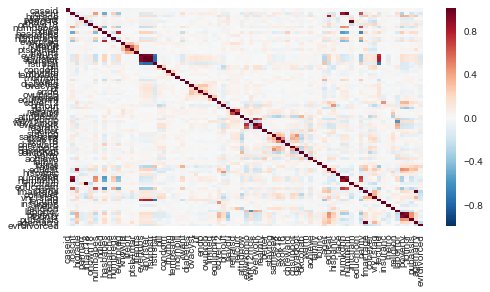

In [53]:
sns.heatmap(corrmat)

marendhx isn't in the downsized columns so redo using evrdivorced
#histogram with highest grade completed
ndv=resp6[(resp6.marendhx!=2) & (resp6.evrmarry==1)].higrade.dropna()
dv=resp6[(resp6.marendhx==2) & (resp6.evrmarry==1)].higrade.dropna()

In [54]:
#histogram with highest grade completed
ndv=resp6[(resp6.evrdivorced==0)].higrade.dropna()
dv=resp6[(resp6.evrdivorced==1)].higrade.dropna()

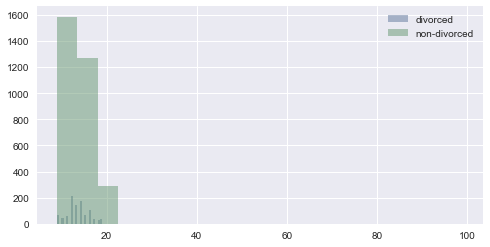

In [55]:
pyplot.hist(dv, bins=20, alpha=0.5, label='divorced')
pyplot.hist(ndv, bins=20, alpha=0.5, label='non-divorced')
pyplot.legend(loc='upper right')
pyplot.show()

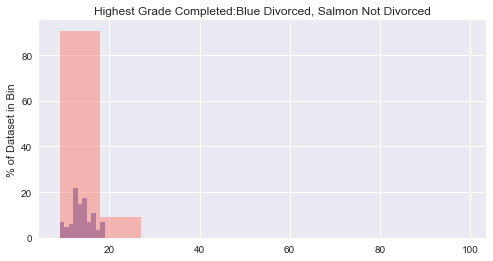

In [56]:
dvweights = 100 * np.ones_like(dv) / dv.size
ndvweights = 100 * np.ones_like(ndv) / ndv.size

fig, ax = plt.subplots()
ax.hist(dv, weights=dvweights, color='darkblue', alpha=0.5, label='divorced')
ax.hist(ndv, weights=ndvweights, color='salmon', alpha=0.5, label='not divorced')

ax.set(title='Highest Grade Completed:Blue Divorced, Salmon Not Divorced', ylabel='% of Dataset in Bin')
ax.margins(0.05)
ax.set_ylim(bottom=0)
plt.show()

In [57]:
#correlate all columns to the target "everdivorced"
corrmat=resp6.corr(method='pearson')["evrdivorced"]

In [58]:
corrmat.nlargest(30)

evrdivorced    1.000000
ager           0.212419
rstrstat       0.141280
brnout         0.102303
better         0.101545
attndnow       0.100393
hispanic       0.078107
intctfam       0.077006
intact18       0.077006
rwant          0.074193
okcohab        0.061896
wrk12mos       0.061114
numpregs       0.049703
lifeprt        0.048336
parity         0.047146
knowfp         0.032854
achieve        0.032798
lifeprts       0.032373
tempsafe       0.027440
chreward       0.025666
numbabes       0.024908
paydu          0.023752
ndied          0.022886
metro          0.020012
pubassis       0.015080
educmom        0.012374
parmarr        0.011899
sxok16         0.008502
religion       0.004556
insuranc       0.004508
Name: evrdivorced, dtype: float64

In [59]:
corrmat.nsmallest(10)
#resp6['cmmarrhx'].max()
#resp6['cmmarrhx'].nlargest(50)

agemarry   -0.263336
fmar1age   -0.260617
cohever    -0.208164
vry1stag   -0.172224
anyfster   -0.158590
numfmhh    -0.156118
rsurgstr   -0.153307
roscnt     -0.150432
evertubs   -0.136649
fecund     -0.134922
Name: evrdivorced, dtype: float64

In [60]:
corrmat.nlargest(10)

evrdivorced    1.000000
ager           0.212419
rstrstat       0.141280
brnout         0.102303
better         0.101545
attndnow       0.100393
hispanic       0.078107
intctfam       0.077006
intact18       0.077006
rwant          0.074193
Name: evrdivorced, dtype: float64

In [61]:
#resp6.to_csv('resp6.csv', sep=',', encoding='utf-8')
#get a list of variables with null values to eliminate in purge3
#resp6.isnull().any().to_csv('nullvalues.csv', sep=',', encoding='utf-8')

In [62]:
#resp6 = resp6[['caseid', 'rostscrn', 'rscreenrace', 'age_r', 'roscnt', 'goschol', 'higrade', 'compgrd', 'havedip', 'dipged', 'havedeg', 'degrees', 'onown', 'intact', 'parmarr', 'lvsit14f', 'lvsit14m', 'momdegre', 'momworkd', 'momchild', 'momfstch', 'manrasdu', 'daddegre', 'intact18', 'onown18', 'numbabes', 'totplacd', 'ndied', 'hasbabes', 'menarche', 'numpregs', 'everpreg', 'agemarhx', 'hxagemar', 'lvtoghx', 'engaghx', 'racehx1', 'chedmarn', 'marbefhx', 'kidshx', 'numkdshx', 'kidlivhx', 'agefstsx', 'c_sex18', 'c_sex15', 'c_sex20', 'grfstsx', 'talkpar1', 'pledge', 'fpage', 'fprelage', 'fprelyrs', 'knowfp', 'agesxafm', 'afmen18', 'afmen15', 'afmen20', 'lifeprt', 'ptsb4mar', 'lifeprts', 'evertubs', 'everhyst', 'everovrs', 'everothr', 'anyfster', 'rsurgstr', 'posiblpg', 'reasimpr', 'canhaver', 'pregnono', 'rstrstat', 'pill', 'condom', 'vasectmy', 'widrawal', 'depoprov', 'norplant', 'rhythm', 'tempsafe', 'mornpill', 'ectimesx', 'nometh', 'nometh2', 'mthfrsts01', 'mthfstsx01', 'pap12', 'pelvic12', 'rwant', 'typallpg', 'hlpmc', 'infrtprb', 'diabetes', 'ovacyst', 'uf', 'endo', 'ovuprob', 'limited', 'equipmnt', 'cover12', 'brnout', 'paydu', 'relraisd', 'attnd14', 'relcurr', 'fundam', 'reldlife', 'attndnow', 'evwrk6mo', 'cmbfstwk', 'evrntwrk', 'wrk12mos', 'fpt12mos', 'dolastwk1', 'rwrkst', 'everwork', 'rpayjob', 'rnumjob', 'rftptx', 'rearnty', 'better', 'staytog', 'samesex', 'anyact', 'sxok18', 'sxok16', 'chreward', 'chsuppor', 'gayadopt', 'okcohab', 'warm', 'achieve', 'family', 'chbother', 'lessplsr', 'wage', 'selfinc', 'socsec', 'disabil', 'retire', 'ssi', 'unemp', 'interest', 'dividend', 'toincwmy', 'totinc', 'pubasst', 'pubastyp1', 'foodstmp', 'wic', 'hlptrans', 'hlpchldc', 'hlpjob', 'ager', 'educat', 'hieduc', 'hispanic', 'race', 'hisprace', 'numkdhh', 'numfmhh', 'intctfam', 'parage14', 'educmom', 'agemomb1', 'compreg', 'lossnum', 'abortion', 'lbpregs', 'parity', 'births5', 'outcom01', 'ageprg01', 'agecon01', 'cebow', 'cebowc', 'agebaby1', 'liv1chld', 'fmar1age', 'b1premar', 'cohever', 'vry1stag', 'sex1age', 'fsexpage', 'fecund', 'infert', 'condomr', 'sex1mthd1', 'oldwp01', 'wantrp01', 'wantp01', 'fptit12', 'fptitmed', 'anyprghp', 'anymschp', 'infever', 'evhivtst', 'insuranc', 'metro', 'religion', 'laborfor', 'poverty', 'totincr', 'pubassis', 'agemarry', 'evrdivorced']].copy()

In [63]:
resp6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4126 entries, 1 to 7638
Data columns (total 78 columns):
caseid         4126 non-null int64
roscnt         4126 non-null int64
higrade        4126 non-null int64
parmarr        4126 non-null int64
intact18       4126 non-null int64
onown18        4126 non-null int64
numbabes       4126 non-null int64
ndied          4126 non-null int64
hasbabes       4126 non-null int64
menarche       4126 non-null int64
numpregs       4126 non-null float64
everpreg       4126 non-null int64
knowfp         4126 non-null float64
lifeprt        4126 non-null float64
ptsb4mar       4126 non-null float64
lifeprts       4126 non-null int64
evertubs       4126 non-null int64
anyfster       4126 non-null int64
rsurgstr       4126 non-null int64
rstrstat       4126 non-null int64
pill           4126 non-null int64
condom         4126 non-null float64
rhythm         4126 non-null float64
tempsafe       4126 non-null float64
mornpill       4126 non-null float64
rw

In [64]:
#tried to remove rows with missing values
#resp6=resp6.dropna(axis=0)
#This leaves only 30 rows so it's not a good idea.

In [65]:
print(resp6.shape)

(4126, 78)


In [66]:
resp6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4126 entries, 1 to 7638
Data columns (total 78 columns):
caseid         4126 non-null int64
roscnt         4126 non-null int64
higrade        4126 non-null int64
parmarr        4126 non-null int64
intact18       4126 non-null int64
onown18        4126 non-null int64
numbabes       4126 non-null int64
ndied          4126 non-null int64
hasbabes       4126 non-null int64
menarche       4126 non-null int64
numpregs       4126 non-null float64
everpreg       4126 non-null int64
knowfp         4126 non-null float64
lifeprt        4126 non-null float64
ptsb4mar       4126 non-null float64
lifeprts       4126 non-null int64
evertubs       4126 non-null int64
anyfster       4126 non-null int64
rsurgstr       4126 non-null int64
rstrstat       4126 non-null int64
pill           4126 non-null int64
condom         4126 non-null float64
rhythm         4126 non-null float64
tempsafe       4126 non-null float64
mornpill       4126 non-null float64
rw

In [67]:
ID = resp6['caseid']
target = resp6["evrdivorced"] 

In [69]:
#agemarry still has null values
#resp6['agemarry'] = resp6.['agemarry'].dropna()
#resp6.info()
#fill in nulls with median values
resp6 = resp6.fillna(lambda x: x.median())
resp6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4126 entries, 1 to 7638
Data columns (total 78 columns):
caseid         4126 non-null int64
roscnt         4126 non-null int64
higrade        4126 non-null int64
parmarr        4126 non-null int64
intact18       4126 non-null int64
onown18        4126 non-null int64
numbabes       4126 non-null int64
ndied          4126 non-null int64
hasbabes       4126 non-null int64
menarche       4126 non-null int64
numpregs       4126 non-null float64
everpreg       4126 non-null int64
knowfp         4126 non-null float64
lifeprt        4126 non-null float64
ptsb4mar       4126 non-null float64
lifeprts       4126 non-null int64
evertubs       4126 non-null int64
anyfster       4126 non-null int64
rsurgstr       4126 non-null int64
rstrstat       4126 non-null int64
pill           4126 non-null int64
condom         4126 non-null float64
rhythm         4126 non-null float64
tempsafe       4126 non-null float64
mornpill       4126 non-null float64
rw

In [70]:
cols = ['caseid', 'roscnt','higrade', 'parmarr',  'intact18', 'onown18', 'numbabes', 'ndied', 'hasbabes', 'menarche', 'numpregs', 'everpreg', 'knowfp', 'lifeprt', 'ptsb4mar', 'lifeprts', 'evertubs', 'anyfster', 'rsurgstr', 'rstrstat', 'pill', 'condom', 'rhythm', 'tempsafe', 'mornpill', 'rwant', 'diabetes', 'ovacyst', 'uf', 'endo', 'ovuprob', 'limited', 'equipmnt', 'cover12', 'brnout', 'paydu', 'relraisd', 'relcurr', 'attndnow', 'evwrk6mo', 'wrk12mos', 'everwork', 'rearnty', 'better', 'staytog', 'samesex', 'sxok18', 'sxok16', 'chreward', 'chsuppor', 'gayadopt', 'okcohab', 'warm', 'achieve', 'family', 'totinc', 'ager', 'educat', 'hispanic', 'race', 'numkdhh', 'numfmhh', 'intctfam', 'educmom', 'parity', 'fmar1age', 'cohever', 'vry1stag', 'fecund', 'insuranc', 'metro', 'religion', 'laborfor', 'poverty', 'totincr', 'pubassis', 'evrdivorced']
resp6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4126 entries, 1 to 7638
Data columns (total 78 columns):
caseid         4126 non-null int64
roscnt         4126 non-null int64
higrade        4126 non-null int64
parmarr        4126 non-null int64
intact18       4126 non-null int64
onown18        4126 non-null int64
numbabes       4126 non-null int64
ndied          4126 non-null int64
hasbabes       4126 non-null int64
menarche       4126 non-null int64
numpregs       4126 non-null float64
everpreg       4126 non-null int64
knowfp         4126 non-null float64
lifeprt        4126 non-null float64
ptsb4mar       4126 non-null float64
lifeprts       4126 non-null int64
evertubs       4126 non-null int64
anyfster       4126 non-null int64
rsurgstr       4126 non-null int64
rstrstat       4126 non-null int64
pill           4126 non-null int64
condom         4126 non-null float64
rhythm         4126 non-null float64
tempsafe       4126 non-null float64
mornpill       4126 non-null float64
rw

In [71]:
#drop agemarry
resp6 = resp6[['roscnt','higrade', 'parmarr',  'intact18', 'onown18', 'numbabes', 'ndied', 'hasbabes', 'menarche', 'numpregs', 'everpreg', 'knowfp', 'lifeprt', 'ptsb4mar', 'lifeprts', 'evertubs', 'anyfster', 'rsurgstr', 'rstrstat', 'pill', 'condom', 'rhythm', 'tempsafe', 'mornpill', 'rwant', 'diabetes', 'ovacyst', 'uf', 'endo', 'ovuprob', 'limited', 'equipmnt', 'cover12', 'brnout', 'paydu', 'relraisd', 'relcurr', 'attndnow', 'evwrk6mo', 'wrk12mos', 'everwork', 'rearnty', 'better', 'staytog', 'samesex', 'sxok18', 'sxok16', 'chreward', 'chsuppor', 'gayadopt', 'okcohab', 'warm', 'achieve', 'family', 'totinc', 'ager', 'educat', 'hispanic', 'race', 'numkdhh', 'numfmhh', 'intctfam', 'educmom', 'parity', 'fmar1age', 'cohever', 'vry1stag', 'fecund', 'insuranc', 'metro', 'religion', 'laborfor', 'poverty', 'totincr', 'pubassis']].copy()

#Machine Learning Begins Here
#Should I delete from here down for the data story report?

In [72]:
import sklearn
from sklearn.metrics import roc_auc_score
from sklearn.grid_search import GridSearchCV


C:\Users\Karen\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Karen\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [74]:
# evaluate the model by splitting into train and test sets
#xtrain, xtest, ytrain, ytest = train_test_split(resp6.values, target.values, test_size=0.3, random_state=0)
xtrain, xtest, ytrain, ytest = sklearn.cross_validation.train_test_split(resp6.values, target.values, train_size=0.8)
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
#model = LogisticRegression()
#model = model.fit(xtrain, ytrain)

# check the accuracy on the training set
model.score(xtrain, ytrain)

0.82030303030303031

#
xtrain, xtest, ytrain, ytest = train_test_split(
    resp6.values, target.values, train_size=0.8)
model2 = LogisticRegression()
model2.fit(xtrain, ytrain)
#lr_preds = linreg.predict(xtest)
#lr_perf = roc_auc_score(ytest, lr_preds)

In [76]:
# predict class labels for the test set
predicted = model.predict(xtest)
print(predicted)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 

In [77]:
# generate class probabilities
probs = model.predict_proba(xtest)
print(probs)

[[ 0.03817964  0.96182036]
 [ 0.41475745  0.58524255]
 [ 0.83557258  0.16442742]
 ..., 
 [ 0.81615717  0.18384283]
 [ 0.81523305  0.18476695]
 [ 0.70348542  0.29651458]]


In [78]:
#As you can see, the classifier is predicting a 1 (divorced) any time the probability in the second column is greater than 0.5.

#Now let's generate some evaluation metrics.

In [79]:
# generate evaluation metrics
print(metrics.accuracy_score(ytest, predicted))
print(metrics.roc_auc_score(ytest, probs[:, 1]))

0.808716707022
0.81013950608


The accuracy is 82%.
The ROC is 84%
We can also produce a confusion matrix and a classification report with other metrics.

In [80]:
print(metrics.confusion_matrix(ytest, predicted))
print(metrics.classification_report(ytest, predicted))

[[591  48]
 [110  77]]
             precision    recall  f1-score   support

          0       0.84      0.92      0.88       639
          1       0.62      0.41      0.49       187

avg / total       0.79      0.81      0.79       826



Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [81]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), resp6.values, target.values, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.79176755  0.79176755  0.79903148  0.79661017  0.82566586  0.80387409
  0.8062954   0.82038835  0.82281553  0.8053528 ]
0.806356878809


In [82]:
#The mean of the scores is approx. 80%

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.grid_search import GridSearchCV

In [87]:
xtrain, xtest, ytrain, ytest = sklearn.cross_validation.train_test_split(resp6.values, target.values, train_size=0.8)
gbm = GradientBoostingClassifier(n_estimators=100)
gbm.fit(xtrain, ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [88]:
model.score(xtrain, ytrain)

0.8196969696969697

In [89]:
# predict class labels for the test set
predicted = model.predict(xtest)
print(predicted)

[0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 0 

In [90]:
# generate class probabilities
probs = model.predict_proba(xtest)
print(probs)

[[ 0.93737012  0.06262988]
 [ 0.36646536  0.63353464]
 [ 0.89418896  0.10581104]
 ..., 
 [ 0.98919615  0.01080385]
 [ 0.90442087  0.09557913]
 [ 0.92497135  0.07502865]]


In [91]:
# generate evaluation metrics
print(metrics.accuracy_score(ytest, predicted))
print(metrics.roc_auc_score(ytest, probs[:, 1]))

0.811138014528
0.853957821071


In [92]:
print(metrics.confusion_matrix(ytest, predicted))
print(metrics.classification_report(ytest, predicted))

[[579  43]
 [113  91]]
             precision    recall  f1-score   support

          0       0.84      0.93      0.88       622
          1       0.68      0.45      0.54       204

avg / total       0.80      0.81      0.80       826



In [93]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(GradientBoostingClassifier(), resp6.values, target.values, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.84261501  0.83292978  0.83535109  0.81598063  0.87893462  0.86682809
  0.83535109  0.85679612  0.84708738  0.83211679]
0.844399059824


In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.grid_search import GridSearchCV

gbm = GradientBoostingClassifier(n_estimators=100)

gbm.fit(xtrain, ytrain)
gbm_preds = gbm.predict_proba(xtest)[:, 1]
gbm_performance = roc_auc_score(ytest, gbm_preds)

print ('GBM: Area under the ROC curve = {}'.format(gbm_performance))

GBM: Area under the ROC curve = 0.8899423113296766


gbm_preds = gbm.predict_proba(xtrain)[:, 1]
gbm_performance = roc_auc_score(ytrain, gbm_preds)

print ('GBM: Area under the ROC curve = {}'.format(gbm_performance))

In [96]:
print(gbm_preds.astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [97]:
gbmreport = metrics.classification_report(ytest, gbm_preds.astype(int))
print(gbmreport)

             precision    recall  f1-score   support

          0       0.75      1.00      0.86       622
          1       0.00      0.00      0.00       204

avg / total       0.57      0.75      0.65       826



C:\Users\Karen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
tree = GridSearchCV(DecisionTreeClassifier(),
                    {'max_depth': np.arange(3, 10)})
tree.fit(xtrain, ytrain)
tree_preds = tree.predict_proba(xtest)[:, 1]
tree_performance = roc_auc_score(ytest, tree_preds)
print ('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

DecisionTree: Area under the ROC curve = 0.849954290397831


In [99]:
importances = pd.Series(gbm.feature_importances_, index=resp6.columns)
print (importances.order(ascending=False)[:30])

ptsb4mar    0.109746
fmar1age    0.104855
lifeprts    0.087800
lifeprt     0.081386
ager        0.072787
numfmhh     0.049026
vry1stag    0.041312
poverty     0.030796
numkdhh     0.025870
race        0.022237
higrade     0.019928
educat      0.018912
knowfp      0.017158
relcurr     0.015735
totincr     0.015501
samesex     0.014527
roscnt      0.014508
better      0.014477
numpregs    0.013650
menarche    0.013472
laborfor    0.013073
relraisd    0.012623
parmarr     0.011880
hispanic    0.011874
wrk12mos    0.010644
staytog     0.010444
equipmnt    0.010415
cohever     0.010128
educmom     0.009215
attndnow    0.008326
dtype: float64


In [100]:
#Random Forest Classifier


In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
#from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import roc_auc_score
#from sklearn.grid_search import GridSearchCV
xtrain, xtest, ytrain, ytest = sklearn.cross_validation.train_test_split(resp6.values, target.values, train_size=0.8)
rf = RandomForestClassifier(n_estimators=100)
rf.fit(xtrain, ytrain)
model.score(xtrain, ytrain)
# predict class labels for the test set
rfpredicted = model.predict(xtest)
print(rfpredicted)
# generate class probabilities
probs = model.predict_proba(xtest)
print(probs)
# generate evaluation metrics
print(metrics.accuracy_score(ytest, rfpredicted))
print(metrics.roc_auc_score(ytest, probs[:, 1]))
print(metrics.confusion_matrix(ytest, rfpredicted))
print(metrics.classification_report(ytest, rfpredicted))
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(RandomForestClassifier(), resp6.values, target.values, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())


[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 

In [104]:
resp6['is_train'] = np.random.uniform(0, 1, len(resp6)) <= .75

In [106]:
resp6['evrd'] = target

In [107]:
resp6.head()

,roscnt,higrade,parmarr,intact18,onown18,numbabes,ndied,hasbabes,menarche,numpregs,...,fecund,insuranc,metro,religion,laborfor,poverty,totincr,pubassis,is_train,evrd
1,2,14,1,1,5,1,0,1,12,1.0,...,1,4,1,1,1,334,10,2,True,1
2,1,12,1,1,5,1,0,1,8,1.0,...,1,4,1,1,9,156,5,2,True,1
5,4,9,5,1,5,6,0,1,16,8.0,...,6,1,1,2,7,128,7,1,True,0
8,4,12,1,1,5,3,0,1,11,3.0,...,6,2,2,2,1,99,6,2,True,0
10,3,12,1,1,5,2,0,1,11,2.0,...,1,2,2,2,7,237,9,2,False,0


In [108]:
train, test = resp6[resp6['is_train']==True], resp6[resp6['is_train']==False]

In [109]:
features = resp6.columns[:75]

In [110]:
clf = RandomForestClassifier(n_jobs=2)

In [111]:
y, _ = pd.factorize(train['evrd'])


In [112]:
clf.fit(train[features], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [113]:
preds = clf.predict(test[features])

In [114]:
pd.crosstab(test['evrd'], preds, rownames=['actual'], colnames=['preds'])

preds,0,1
actual,,
0,87,648
1,120,130


In [115]:
print(ytest)

[0 0 0 ..., 0 1 0]
